In [142]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, concatenate, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from livelossplot import PlotLossesKeras
from keras.models import Model
from keras.models import load_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import cv2
import itertools
import os
import shutil
import random
import glob

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
######RENDERING IN GPU######
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
# tf.test.is_built_with_cuda()

# gpu_devices = tf.config.experimental.list_physical_devices('CPU')
# tf.config.experimental.set_memory_growth(gpu_devices[0], True)
# print("Num of GPUs avaliable: ", len(gpu_devices))
# print(gpu_devices)


######RENDERING IN CPU######
# from tensorflow.python.client import device_lib
# def get_available_devices():
#     local_device_protos = device_lib.list_local_devices()
#     return [x.name for x in local_device_protos if x.device_type == 'GPU' or x.device_type == 'CPU']


######RENDERING SIMULTANEOUSLY######
# with tf.device("gpu:0"):
#    print("tf.keras code in this scope will run on GPU")

# with tf.device("cpu:0"):
#    print("tf.keras code in this scope will run on CPU")

In [60]:
#Confusion Matrix class form scikit-learn documentation
#https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
######CLASSIFICATION AND AUGMENTATION######
########skip if already done########

# os.makedirs('dataset/processed/train/normal')
# os.makedirs('dataset/processed/train/rusted')
# os.makedirs('dataset/processed/test/normal')
# os.makedirs('dataset/processed/test/rusted')
# os.makedirs('dataset/processed/valid/normal')
# os.makedirs('dataset/processed/valid/rusted')

# for i in random.sample(glob.glob('dataset/raw/n*'),20):
#     shutil.copy(i, 'dataset/processed/train/normal')
# for i in random.sample(glob.glob('dataset/raw/r*'),20):
#     shutil.copy(i, 'dataset/processed/train/rusted')
# for i in random.sample(glob.glob('dataset/raw/n*'),5):
#     shutil.copy(i, 'dataset/processed/test/normal')
# for i in random.sample(glob.glob('dataset/raw/r*'),5):
#     shutil.copy(i, 'dataset/processed/test/rusted')
# for i in random.sample(glob.glob('dataset/raw/n*'),5):
#     shutil.copy(i, 'dataset/processed/valid/normal')
# for i in random.sample(glob.glob('dataset/raw/r*'),5):
#     shutil.copy(i, 'dataset/processed/valid/rusted')

In [5]:
# augmentation = ImageDataGenerator(rotation_range = 50, width_shift_range = 0.5, 
#                                  height_shift_range = 0.5, shear_range = 0.5, zoom_range = 0.3,
#                                  channel_shift_range = 10., horizontal_flip = True)

# os.makedirs('dataset/augmented/train/normal')
# os.makedirs('dataset/augmented/train/rusted')
# os.makedirs('dataset/augmented/test/normal')
# os.makedirs('dataset/augmented/test/rusted')
# os.makedirs('dataset/augmented/valid/normal')
# os.makedirs('dataset/augmented/valid/rusted')

# normal_images = os.listdir('dataset/processed/train/normal/')
# for i in normal_images:
#     image_path = 'dataset/processed/train/normal/' + i
#     image = np.expand_dims(plt.imread(image_path),0)
#     aug_iter = augmentation.flow(image, save_to_dir='dataset/augmented/train/normal/', save_prefix='normal', save_format='png')
#     aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

# normal_images = os.listdir('dataset/processed/valid/normal/')
# for i in normal_images:
#     image_path = 'dataset/processed/valid/normal/' + i
#     image = np.expand_dims(plt.imread(image_path),0)
#     aug_iter = augmentation.flow(image, save_to_dir='dataset/augmented/valid/normal/', save_prefix='normal', save_format='png')
#     aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
    
# normal_images = os.listdir('dataset/processed/test/normal/')
# for i in normal_images:
#     image_path = 'dataset/processed/test/normal/' + i
#     image = np.expand_dims(plt.imread(image_path),0)
#     aug_iter = augmentation.flow(image, save_to_dir='dataset/augmented/test/normal/', save_prefix='normal', save_format='png')
#     aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

# rusted_images = os.listdir('dataset/processed/train/rusted/')
# for i in rusted_images:
#     image_path = 'dataset/processed/train/rusted/' + i
#     image = np.expand_dims(plt.imread(image_path),0)
#     aug_iter = augmentation.flow(image, save_to_dir='dataset/augmented/train/rusted/', save_prefix='rusted', save_format='png')
#     aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

# rusted_images = os.listdir('dataset/processed/valid/rusted/')
# for i in rusted_images:
#     image_path = 'dataset/processed/valid/rusted/' + i
#     image = np.expand_dims(plt.imread(image_path),0)
#     aug_iter = augmentation.flow(image, save_to_dir='dataset/augmented/valid/rusted/', save_prefix='rusted', save_format='png')
#     aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
    
# rusted_images = os.listdir('dataset/processed/test/rusted/')
# for i in rusted_images:
#     image_path = 'dataset/processed/test/rusted/' + i
#     image = np.expand_dims(plt.imread(image_path),0)
#     aug_iter = augmentation.flow(image, save_to_dir='dataset/augmented/test/rusted/', save_prefix='rusted', save_format='png')
#     aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

In [3]:
traindir = 'dataset/augmented/train'
valdir = 'dataset/augmented/valid'
testdir = 'dataset/augmented/test'

## VGG16

In [7]:
train = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=traindir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10)
val = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valdir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10)
test = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=testdir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10, shuffle = False)

Found 394 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

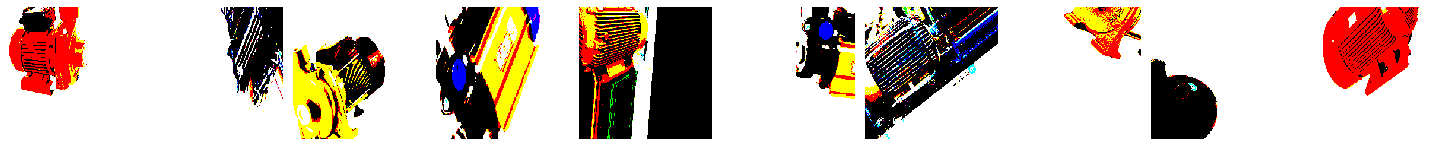

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [8]:
sample_images, sample_labels = next(train)

def displayImages(images):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img, interpolation='none')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

displayImages(sample_images)
print(sample_labels)

In [9]:
vgg16_model = Sequential()

pretrained_model= tf.keras.applications.vgg16.VGG16(include_top=False,
                   input_shape=None,
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

vgg16_model.add(pretrained_model)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(2, activation='softmax'))

vgg16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


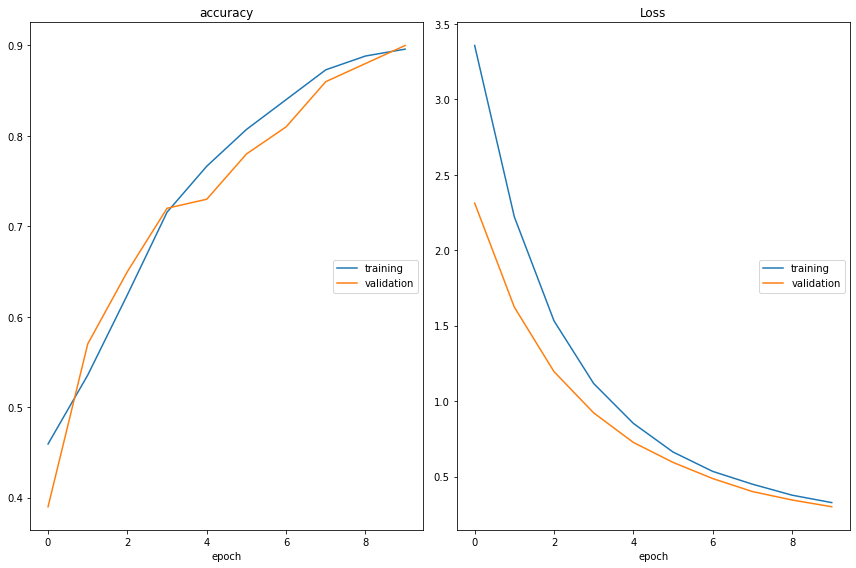

accuracy
	training         	 (min:    0.459, max:    0.896, cur:    0.896)
	validation       	 (min:    0.390, max:    0.900, cur:    0.900)
Loss
	training         	 (min:    0.327, max:    3.358, cur:    0.327)
	validation       	 (min:    0.300, max:    2.313, cur:    0.300)
40/40 [==============================] - 30s 731ms/step - loss: 0.3269 - accuracy: 0.8959 - val_loss: 0.2995 - val_accuracy: 0.9000


In [10]:
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_model.fit(x=train, validation_data=val, epochs=10, callbacks=[PlotLossesKeras()], verbose=1)

In [11]:
import os.path
if os.path.isfile('models/vgg16_model.h5') is False:
    vgg16_model.save('models/vgg16_model.h5')

In [12]:
vgg16_predict = vgg16_model.predict(x=test, verbose=0)
vgg16_acc = accuracy_score(y_true=test.classes, y_pred=np.argmax(vgg16_predict, axis=-1))
vgg16_rec = recall_score(y_true=test.classes, y_pred=np.argmax(vgg16_predict, axis=-1))
vgg16_pre = precision_score(y_true=test.classes, y_pred=np.argmax(vgg16_predict, axis=-1))
vgg16_f1 = f1_score(y_true=test.classes, y_pred=np.argmax(vgg16_predict, axis=-1))
print("Accuracy: " , vgg16_acc , "| Recall: " , vgg16_rec , "| Precision: " , vgg16_pre , "| F1 score: " , vgg16_f1)

Accuracy:  0.98 | Recall:  1.0 | Precision:  0.9615384615384616 | F1 score:  0.9803921568627451


Confusion matrix, without normalization
[[48  2]
 [ 0 50]]


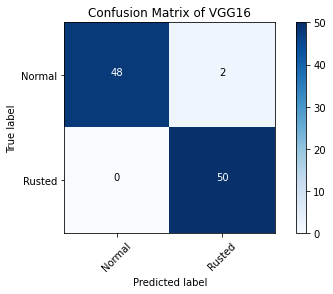

In [13]:
vgg16_conf = confusion_matrix(y_true=test.classes, y_pred=np.argmax(vgg16_predict, axis=-1))
vgg16_conf_labels = ['Normal', 'Rusted']
plot_confusion_matrix(cm=vgg16_conf, classes=vgg16_conf_labels, title='Confusion Matrix of VGG16')

## MOBILE NET

In [14]:
train = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=traindir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10)
val = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valdir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10)
test = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=testdir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10, shuffle = False)

Found 394 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

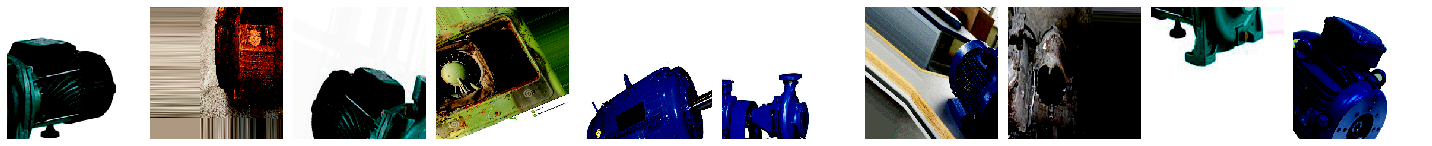

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [15]:
sample_images, sample_labels = next(train)

def displayImages(images):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img, interpolation='none')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

displayImages(sample_images)
print(sample_labels)

In [16]:
mobilenet_model = Sequential()

pretrained_model= tf.keras.applications.mobilenet.MobileNet(include_top=False,
                   input_shape=None,
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

mobilenet_model.add(pretrained_model)
mobilenet_model.add(Flatten())
mobilenet_model.add(Dense(2, activation='softmax'))

mobilenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 3,230,914
Trainable params: 2,050
Non-trainable params: 3,228,864
_________________________________________________________________


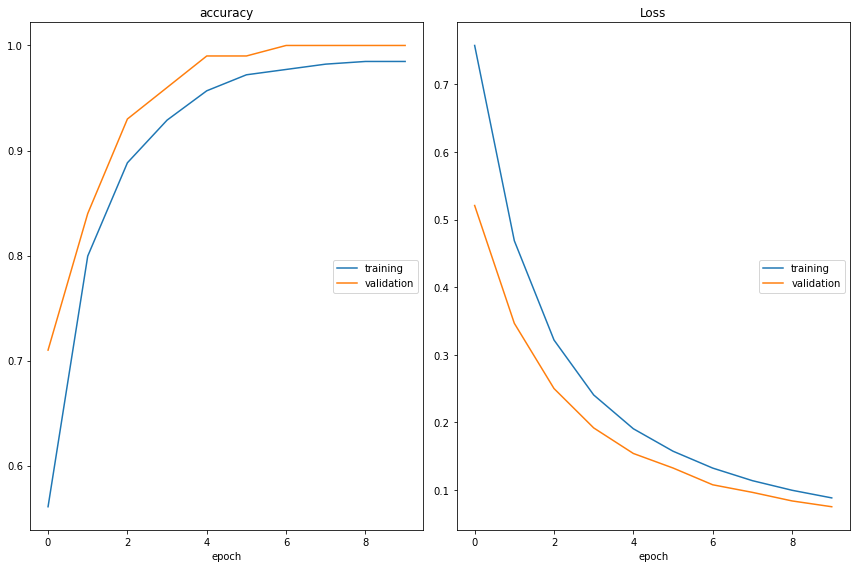

accuracy
	training         	 (min:    0.561, max:    0.985, cur:    0.985)
	validation       	 (min:    0.710, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.088, max:    0.758, cur:    0.088)
	validation       	 (min:    0.075, max:    0.521, cur:    0.075)
40/40 [==============================] - 14s 358ms/step - loss: 0.0882 - accuracy: 0.9848 - val_loss: 0.0751 - val_accuracy: 1.0000


In [17]:
mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_model.fit(x=train, validation_data=val, epochs=10, callbacks=[PlotLossesKeras()], verbose=1)

In [18]:
import os.path
if os.path.isfile('models/mobilenet_model.h5') is False:
    mobilenet_model.save('models/mobilenet_model.h5')

In [19]:
mobilenet_predict = mobilenet_model.predict(x=test, verbose=0)
mobilenet_acc = accuracy_score(y_true=test.classes, y_pred=np.argmax(mobilenet_predict, axis=-1))
mobilenet_rec = recall_score(y_true=test.classes, y_pred=np.argmax(mobilenet_predict, axis=-1))
mobilenet_pre = precision_score(y_true=test.classes, y_pred=np.argmax(mobilenet_predict, axis=-1))
mobilenet_f1 = f1_score(y_true=test.classes, y_pred=np.argmax(mobilenet_predict, axis=-1))
print("Accuracy: " , mobilenet_acc , "| Recall: " , mobilenet_rec , "| Precision: " , mobilenet_pre , "| F1 score: " , mobilenet_f1)

Accuracy:  0.99 | Recall:  1.0 | Precision:  0.9803921568627451 | F1 score:  0.99009900990099


Confusion matrix, without normalization
[[49  1]
 [ 0 50]]


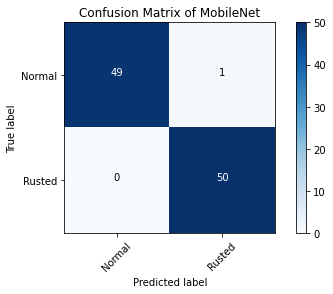

In [20]:
mobilenet_conf = confusion_matrix(y_true=test.classes, y_pred=np.argmax(mobilenet_predict, axis=-1))
mobilenet_conf_labels = ['Normal', 'Rusted']
plot_confusion_matrix(cm=mobilenet_conf, classes=mobilenet_conf_labels, title='Confusion Matrix of MobileNet')

## DENSE NET

In [21]:
train = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=traindir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10)
val = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=valdir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10)
test = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(directory=testdir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10, shuffle = False)

Found 394 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

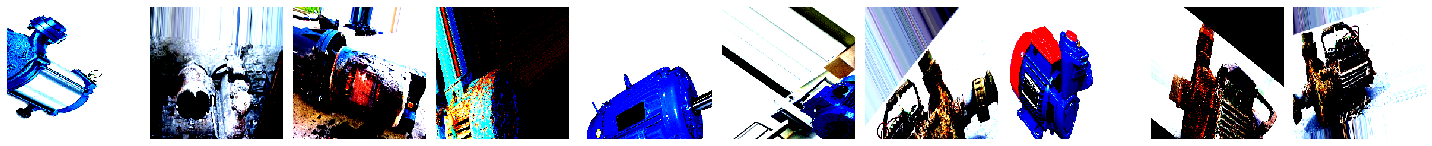

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [22]:
sample_images, sample_labels = next(train)

def displayImages(images):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img, interpolation='none')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

displayImages(sample_images)
print(sample_labels)

In [23]:
densenet_model = Sequential()

pretrained_model= tf.keras.applications.densenet.DenseNet169(include_top=False,
                   input_shape=None,
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(Flatten())
densenet_model.add(Dense(2, activation='softmax'))

densenet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 1664)              12642880  
                                                                 
 flatten_2 (Flatten)         (None, 1664)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 3330      
                                                                 
Total params: 12,646,210
Trainable params: 3,330
Non-trainable params: 12,642,880
_________________________________________________________________


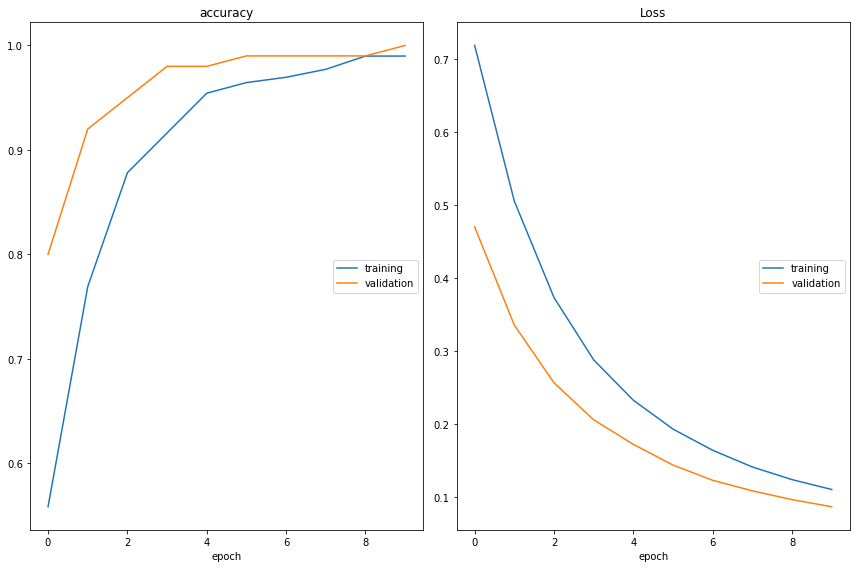

accuracy
	training         	 (min:    0.558, max:    0.990, cur:    0.990)
	validation       	 (min:    0.800, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.110, max:    0.719, cur:    0.110)
	validation       	 (min:    0.087, max:    0.470, cur:    0.087)
40/40 [==============================] - 27s 670ms/step - loss: 0.1104 - accuracy: 0.9898 - val_loss: 0.0868 - val_accuracy: 1.0000


In [24]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
densenet_model.fit(x=train, validation_data=val, epochs=10, callbacks=[PlotLossesKeras()], verbose=1)

In [25]:
import os.path
if os.path.isfile('models/densenet_model.h5') is False:
    mobilenet_model.save('models/densenet_model.h5')

In [26]:
densenet_predict = densenet_model.predict(x=test, verbose=0)
densenet_acc = accuracy_score(y_true=test.classes, y_pred=np.argmax(densenet_predict, axis=-1))
densenet_rec = recall_score(y_true=test.classes, y_pred=np.argmax(densenet_predict, axis=-1))
densenet_pre = precision_score(y_true=test.classes, y_pred=np.argmax(densenet_predict, axis=-1))
densenet_f1 = f1_score(y_true=test.classes, y_pred=np.argmax(densenet_predict, axis=-1))
print("Accuracy: " , densenet_acc , "| Recall: " , densenet_rec , "| Precision: " , densenet_pre , "| F1 score: " , densenet_f1)

Accuracy:  0.99 | Recall:  1.0 | Precision:  0.9803921568627451 | F1 score:  0.99009900990099


Confusion matrix, without normalization
[[49  1]
 [ 0 50]]


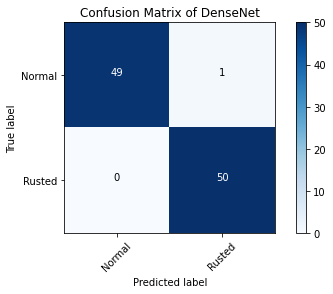

In [27]:
densenet_conf = confusion_matrix(y_true=test.classes, y_pred=np.argmax(densenet_predict, axis=-1))
densenet_conf_labels = ['Normal', 'Rusted']
plot_confusion_matrix(cm=densenet_conf, classes=densenet_conf_labels, title='Confusion Matrix of DenseNet')

## RESNET 50

In [28]:
train = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input).flow_from_directory(directory=traindir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10)
val = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input).flow_from_directory(directory=valdir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10)
test = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input).flow_from_directory(directory=testdir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10, shuffle = False)

Found 394 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

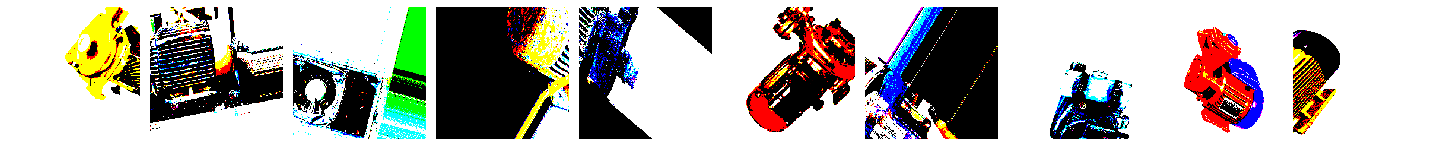

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [29]:
sample_images, sample_labels = next(train)

def displayImages(images):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img, interpolation='none')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

displayImages(sample_images)
print(sample_labels)

In [30]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=None,
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(2, activation='softmax'))

resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


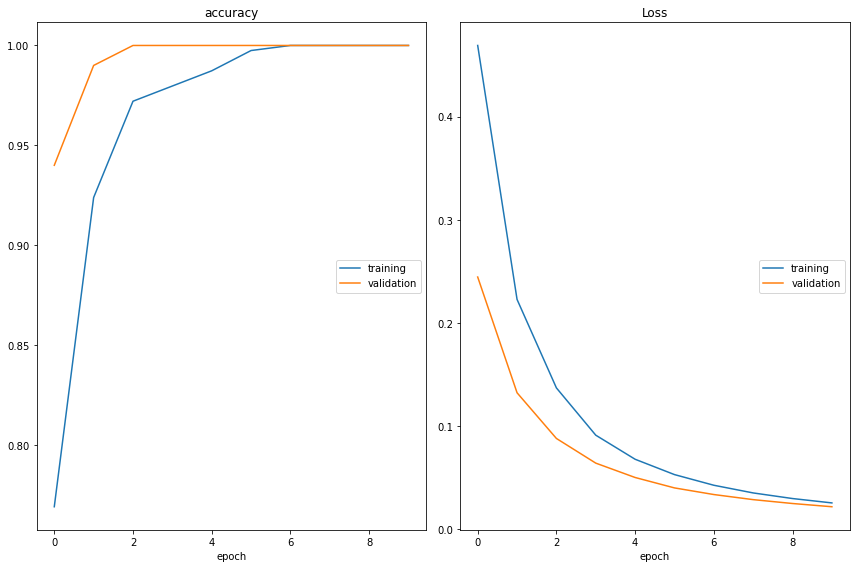

accuracy
	training         	 (min:    0.769, max:    1.000, cur:    1.000)
	validation       	 (min:    0.940, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.026, max:    0.469, cur:    0.026)
	validation       	 (min:    0.022, max:    0.245, cur:    0.022)
40/40 [==============================] - 23s 569ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 1.0000


In [31]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.fit(x=train, validation_data=val, epochs=10, callbacks=[PlotLossesKeras()], verbose=1)

In [32]:
import os.path
if os.path.isfile('models/resnet_model.h5') is False:
    mobilenet_model.save('models/resnet_model.h5')

In [33]:
resnet_predict = resnet_model.predict(x=test, verbose=0)
resnet_acc = accuracy_score(y_true=test.classes, y_pred=np.argmax(resnet_predict, axis=-1))
resnet_rec = recall_score(y_true=test.classes, y_pred=np.argmax(resnet_predict, axis=-1))
resnet_pre = precision_score(y_true=test.classes, y_pred=np.argmax(resnet_predict, axis=-1))
resnet_f1 = f1_score(y_true=test.classes, y_pred=np.argmax(resnet_predict, axis=-1))
print("Accuracy: " , resnet_acc , "| Recall: " , resnet_rec , "| Precision: " , resnet_pre , "| F1 score: " , resnet_f1)

Accuracy:  0.99 | Recall:  1.0 | Precision:  0.9803921568627451 | F1 score:  0.99009900990099


Confusion matrix, without normalization
[[49  1]
 [ 0 50]]


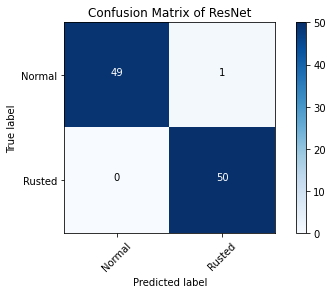

In [34]:
resnet_conf = confusion_matrix(y_true=test.classes, y_pred=np.argmax(resnet_predict, axis=-1))
resnet_conf_labels = ['Normal', 'Rusted']
plot_confusion_matrix(cm=resnet_conf, classes=resnet_conf_labels, title='Confusion Matrix of ResNet')

## INCEPTION

In [35]:
train = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input).flow_from_directory(directory=traindir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10)
val = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input).flow_from_directory(directory=valdir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10)
test = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input).flow_from_directory(directory=testdir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10, shuffle = False)

Found 394 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

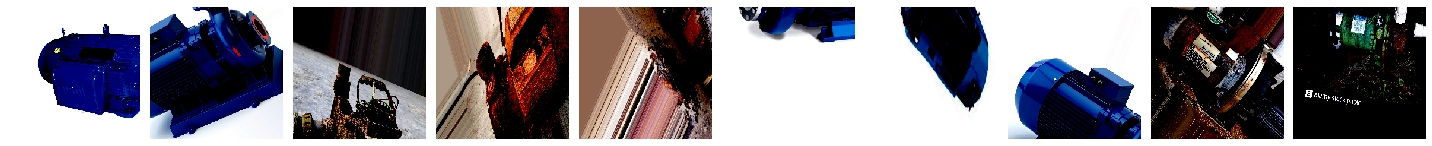

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [36]:
sample_images, sample_labels = next(train)

def displayImages(images):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img, interpolation='none')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

displayImages(sample_images)
print(sample_labels)

In [37]:
inception_model = Sequential()

pretrained_model= tf.keras.applications.InceptionV3(include_top=False,
                   input_shape=None,
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

inception_model.add(pretrained_model)

inception_model.add(Flatten())
inception_model.add(Dense(2, activation='softmax'))

inception_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________


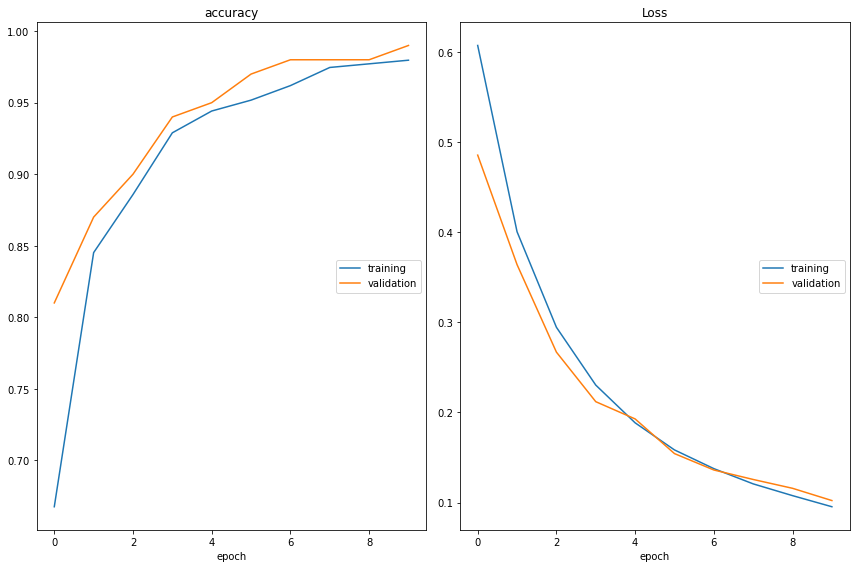

accuracy
	training         	 (min:    0.668, max:    0.980, cur:    0.980)
	validation       	 (min:    0.810, max:    0.990, cur:    0.990)
Loss
	training         	 (min:    0.095, max:    0.607, cur:    0.095)
	validation       	 (min:    0.102, max:    0.486, cur:    0.102)
40/40 [==============================] - 17s 426ms/step - loss: 0.0953 - accuracy: 0.9797 - val_loss: 0.1022 - val_accuracy: 0.9900


In [38]:
inception_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
inception_model.fit(x=train, validation_data=val, epochs=10, callbacks=[PlotLossesKeras()], verbose=1)

In [39]:
import os.path
if os.path.isfile('models/inception_model.h5') is False:
    mobilenet_model.save('models/inception_model.h5')

In [40]:
inception_predict = inception_model.predict(x=test, verbose=0)
inception_acc = accuracy_score(y_true=test.classes, y_pred=np.argmax(inception_predict, axis=-1))
inception_rec = recall_score(y_true=test.classes, y_pred=np.argmax(inception_predict, axis=-1))
inception_pre = precision_score(y_true=test.classes, y_pred=np.argmax(inception_predict, axis=-1))
inception_f1 = f1_score(y_true=test.classes, y_pred=np.argmax(inception_predict, axis=-1))
print("Accuracy: " , inception_acc , "| Recall: " , inception_rec , "| Precision: " , inception_pre , "| F1 score: " , inception_f1)

Accuracy:  0.99 | Recall:  1.0 | Precision:  0.9803921568627451 | F1 score:  0.99009900990099


Confusion matrix, without normalization
[[49  1]
 [ 0 50]]


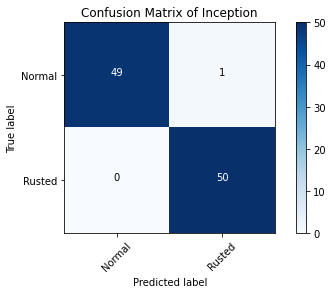

In [41]:
inception_conf = confusion_matrix(y_true=test.classes, y_pred=np.argmax(inception_predict, axis=-1))
inception_conf_labels = ['Normal', 'Rusted']
plot_confusion_matrix(cm=resnet_conf, classes=inception_conf_labels, title='Confusion Matrix of Inception')

## HEATNET

In [8]:
def heatmap(image):
    return cv2.applyColorMap(image.astype(np.uint8), cv2.COLORMAP_HOT)

train = ImageDataGenerator(preprocessing_function=heatmap).flow_from_directory(directory=traindir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10)
val = ImageDataGenerator(preprocessing_function=heatmap).flow_from_directory(directory=valdir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10)
test = ImageDataGenerator(preprocessing_function=heatmap).flow_from_directory(directory=testdir, target_size=(224,224), classes=['normal', 'rusted'], batch_size = 10, shuffle = False)

Found 394 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

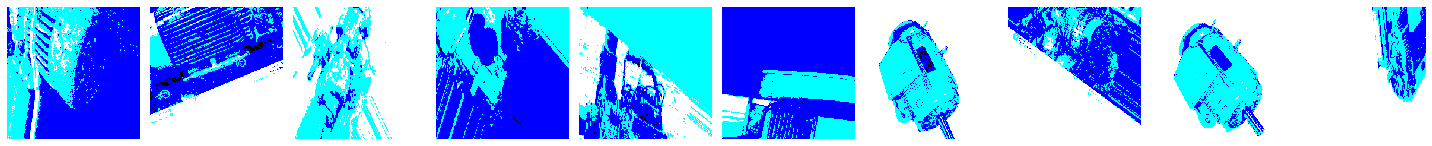

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [63]:
sample_images, sample_labels = next(train)

def displayImages(images):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img, interpolation='none')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

displayImages(sample_images)
print(sample_labels)

In [56]:
heatnet_model = Sequential()
# heatnet_model1 = Sequential()

pretrained_model = tf.keras.applications.mobilenet.MobileNet(include_top=False,
                   input_shape=None,
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False


# pretrained_model1 = tf.keras.applications.ResNet50(include_top=False,
#                    input_shape=None,
#                    pooling='avg',classes=2,
#                    weights='imagenet')
# for layer in pretrained_model1.layers:
#         layer.trainable=False     

        
# out1 = pretrained_model.output  
# out1=GlobalAveragePooling2D()(out1)
# out2 = pretrained_model1.output
# out2=GlobalAveragePooling2D()(out2)

# x = concatenate([out1, out2])  # merge the outputs of the two models
# adjust_layer = Dense(2, activation='softmax')(x)  # final layer of the network

# heatnet_model = Model(inputs=[pretrained_model.input, pretrained_model1.input], outputs=[adjust_layer])

        
heatnet_model.add(pretrained_model)
# heatnet_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (331,331,3)))
# heatnet_model.add(pretrained_model1)
heatnet_model.add(Flatten())
heatnet_model.add(Dense(2, activation='softmax'))
heatnet_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 2)                 2050      
                                                                 
Total params: 3,230,914
Trainable params: 2,050
Non-trainable params: 3,228,864
_________________________________________________________________


In [40]:
# pretrained_model = tf.keras.applications.mobilenet.MobileNet(include_top=False,
#                    input_shape=None,
#                    pooling='avg',classes=2,
#                    weights='imagenet')
# for layer in pretrained_model.layers:
#         layer.trainable=False
        
# pretrained_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                         

In [48]:
# pretrained_model1 = tf.keras.applications.ResNet50(include_top=False,
#                    input_shape=None,
#                    pooling='avg',classes=2,
#                    weights='imagenet')
# for layer in pretrained_model1.layers:
#         layer.trainable=False  

# pretrained_model1.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_43 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_43[0][0]']               
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [57]:
heatnet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
heatnet_model.fit(x=train, validation_data=val, epochs=10, verbose=1)

Epoch 1/10
40/40 [==============================] - 15s 356ms/step - loss: 0.7291 - accuracy: 0.5330 - val_loss: 0.6687 - val_accuracy: 0.5900
Epoch 2/10
40/40 [==============================] - 15s 382ms/step - loss: 0.5904 - accuracy: 0.7030 - val_loss: 0.5481 - val_accuracy: 0.7100
Epoch 3/10
40/40 [==============================] - 14s 359ms/step - loss: 0.4957 - accuracy: 0.7944 - val_loss: 0.4541 - val_accuracy: 0.8700
Epoch 4/10
40/40 [==============================] - 15s 365ms/step - loss: 0.4249 - accuracy: 0.8706 - val_loss: 0.3881 - val_accuracy: 0.9100
Epoch 5/10
40/40 [==============================] - 15s 373ms/step - loss: 0.3741 - accuracy: 0.8832 - val_loss: 0.3368 - val_accuracy: 0.9300
Epoch 6/10
40/40 [==============================] - 14s 353ms/step - loss: 0.3360 - accuracy: 0.9010 - val_loss: 0.3015 - val_accuracy: 0.9500
Epoch 7/10
40/40 [==============================] - 14s 339ms/step - loss: 0.3076 - accuracy: 0.9010 - val_loss: 0.2718 - val_accuracy: 0.9600

In [12]:
import os.path
if os.path.isfile('models/heatnet_model.h5') is False:
    heatnet_model.save('models/heatnet_model.h5')

In [58]:
heatnet_predict = heatnet_model.predict(x=test, verbose=0)
heatnet_acc = accuracy_score(y_true=test.classes, y_pred=np.argmax(heatnet_predict, axis=-1))
heatnet_rec = recall_score(y_true=test.classes, y_pred=np.argmax(heatnet_predict, axis=-1))
heatnet_pre = precision_score(y_true=test.classes, y_pred=np.argmax(heatnet_predict, axis=-1))
heatnet_f1 = f1_score(y_true=test.classes, y_pred=np.argmax(heatnet_predict, axis=-1))
print("Accuracy: " , heatnet_acc , "| Recall: " , heatnet_rec , "| Precision: " , heatnet_pre , "| F1 score: " , heatnet_f1)

Accuracy:  0.99 | Recall:  1.0 | Precision:  0.9803921568627451 | F1 score:  0.99009900990099


Confusion matrix, without normalization
[[49  1]
 [ 0 50]]


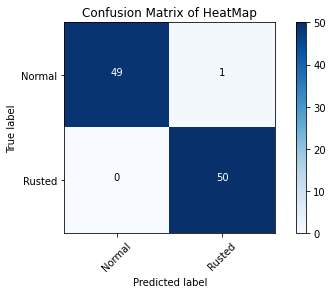

In [61]:
heatnet_conf = confusion_matrix(y_true=test.classes, y_pred=np.argmax(heatnet_predict, axis=-1))
heatnet_conf_labels = ['Normal', 'Rusted']
plot_confusion_matrix(cm=heatnet_conf, classes=heatnet_conf_labels, title='Confusion Matrix of HeatMap')

# COMPARISON

Text(0.5, 1.0, 'Comparison of Keras Networks')

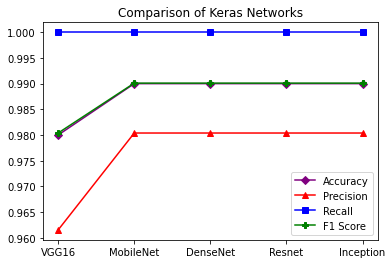

In [42]:
plt.plot(['VGG16','MobileNet','DenseNet','Resnet','Inception','Heatnet'],[vgg16_acc, mobilenet_acc, densenet_acc, resnet_acc, inception_acc, heatmap_acc],color='purple',marker='D')
plt.plot(['VGG16','MobileNet','DenseNet','Resnet','Inception','Heatnet'],[vgg16_pre, mobilenet_pre, densenet_pre, resnet_pre, inception_pre, heatmap_pre],color='red',marker='^')
plt.plot(['VGG16','MobileNet','DenseNet','Resnet','Inception','Heatnet'],[vgg16_rec, mobilenet_rec, densenet_rec, resnet_rec, inception_rec, heatmap_rec],color='blue',marker='s')
plt.plot(['VGG16','MobileNet','DenseNet','Resnet','Inception','Heatnet'],[vgg16_f1, mobilenet_f1, densenet_f1, resnet_f1, inception_f1, heatmap_f1],color='green',marker='P')
plt.legend(('Accuracy','Precision','Recall','F1 Score'))
plt.title('Comparison of Keras Networks')

# USER INPUT

In [155]:
vgg16_model = load_model('models/vgg16_model.h5')
mobilenet_model = load_model('models/mobilenet_model.h5')
densenet_model = load_model('models/densenet_model.h5')
resnet_model = load_model('models/resnet_model.h5')
inception_model = load_model('models/inception_model.h5')
heatnet_model = load_model('models/heatnet_model.h5')

In [189]:
from tensorflow.keras.preprocessing import image
userdir = 'dataset/user/normal.jpg'
userimg = image.load_img(userdir,target_size=(224,224))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[9.999995e-01, 4.486593e-07]], dtype=float32)

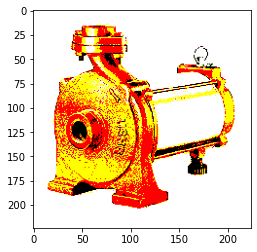

In [190]:
##VGG16
userimg_arr = image.img_to_array(userimg)
userimg_vgg16 = tf.keras.applications.vgg16.preprocess_input(userimg_arr)
plt.imshow(userimg_vgg16)
userimg_vgg16 = np.array(userimg_vgg16)
userimg_vgg16 = userimg_vgg16.reshape(1,224,224,3)
user_vgg16_predict = vgg16_model.predict(x=userimg_vgg16, verbose=0)
user_vgg16_predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[0.9982095 , 0.00179051]], dtype=float32)

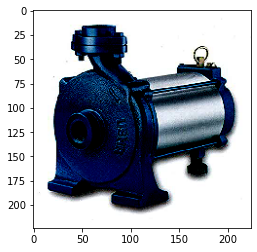

In [191]:
##MOBILE NET
userimg_arr = image.img_to_array(userimg)
userimg_mobilenet = tf.keras.applications.mobilenet.preprocess_input(userimg_arr)
plt.imshow(userimg_mobilenet)
userimg_mobilenet = np.array(userimg_mobilenet)
userimg_mobilenet = userimg_mobilenet.reshape(1,224,224,3)
user_mobilenet_predict = mobilenet_model.predict(x=userimg_mobilenet, verbose=0)
user_mobilenet_predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[0.9957449 , 0.00425514]], dtype=float32)

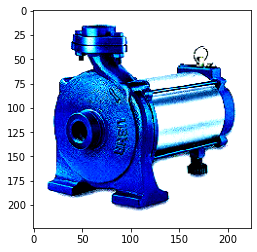

In [192]:
##DENSE NET
userimg_arr = image.img_to_array(userimg)
userimg_densenet = tf.keras.applications.densenet.preprocess_input(userimg_arr)
plt.imshow(userimg_densenet)
userimg_densenet = np.array(userimg_densenet)
userimg_densenet = userimg_densenet.reshape(1,224,224,3)
user_densenet_predict = densenet_model.predict(x=userimg_densenet, verbose=0)
user_densenet_predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[0.75311226, 0.24688773]], dtype=float32)

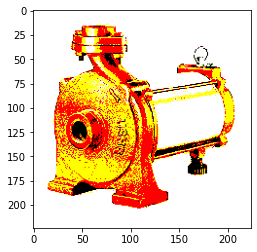

In [193]:
##RESNET
userimg_arr = image.img_to_array(userimg)
userimg_resnet = tf.keras.applications.resnet50.preprocess_input(userimg_arr)
plt.imshow(userimg_resnet)
userimg_resnet = np.array(userimg_resnet)
userimg_resnet = userimg_resnet.reshape(1,224,224,3)
user_resnet_predict = resnet_model.predict(x=userimg_resnet, verbose=0)
user_resnet_predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[0.9982095 , 0.00179051]], dtype=float32)

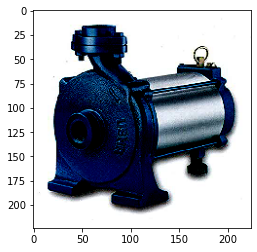

In [194]:
##INCEPTION
userimg_arr = image.img_to_array(userimg)
userimg_inception = tf.keras.applications.inception_v3.preprocess_input(userimg_arr)
plt.imshow(userimg_inception)
userimg_inception = np.array(userimg_inception)
userimg_inception = userimg_inception.reshape(1,224,224,3)
user_inception_predict = inception_model.predict(x=userimg_inception, verbose=0)
user_inception_predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[0.9483635 , 0.05163649]], dtype=float32)

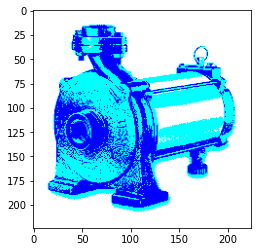

In [196]:
##HEATNET

userimg = cv2.imread(userdir)
userimg = cv2.resize(userimg, (224, 224))
userimg = cv2.applyColorMap(userimg, cv2.COLORMAP_HOT)
userimg_heatnet = image.img_to_array(userimg)
plt.imshow(userimg_heatnet)
userimg_heatnet = np.array(userimg_heatnet)
userimg_heatnet = userimg_heatnet.reshape(1,224,224,3)
user_heatnet_predict = heatnet_model.predict(x=userimg_heatnet, verbose=0)
user_heatnet_predict